In [62]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [65]:
# define base

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [66]:
Base = automap_base()
# Reflect the tables
Base.prepare(autoload_with=engine)

# Save references to the classes
Station = Base.classes.station
Measurement = Base.classes.measurement

#retrieving table names with inspect
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [67]:
# Create our session
session = Session(engine)


In [68]:
# Get measurement columns with inspect
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [69]:
#Get station columns with inspector
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [70]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Start Date is 2016-08-23


Text(0, 0.5, 'Inches')

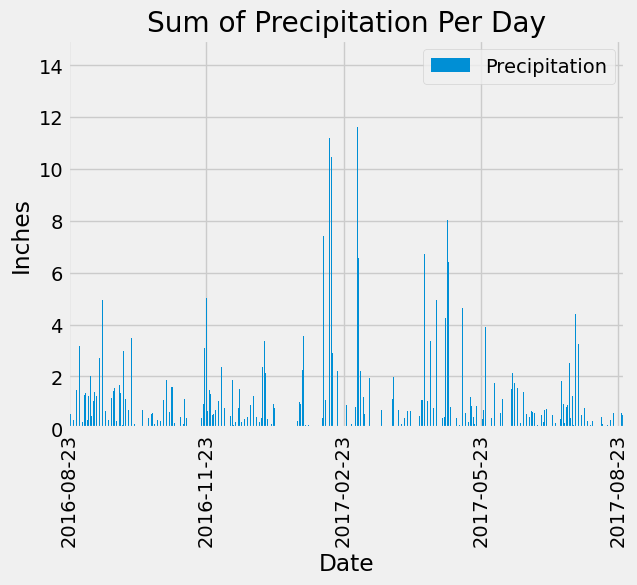

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Start Date is", start_date)

# Perform a query to retrieve the date and precipitation scores
date_rain = session.query(Measurement.date, Measurement.prcp).\
                  filter(Measurement.date >= dt.datetime(2016, 8, 23)).\
                  order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(date_rain, columns=['Date', 'Precipitation'])
measurement_df.head()

# Sort the dataframe by date
grouped_df = measurement_df.groupby('Date')
grouped_df = grouped_df.sum('Precipitation')
grouped_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipplot = grouped_df.plot.bar(title='Sum of Precipitation Per Day', xticks=[0, 90, 180 ,270, 360])
precipplot.set_xticklabels(['2016-08-23', '2016-11-23', '2017-02-23', '2017-05-23', '2017-08-23'])
precipplot.set_xlabel("Date")
precipplot.set_ylabel("Inches")

In [72]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [73]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
results


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temp_stats = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurement.date, Measurement.tobs).\
                  filter(Measurement.date >= dt.datetime(2016, 8, 23)).\
                  filter(Measurement.station == "USC00519281").all()

temperature_df = pd.DataFrame(temp_results, columns=['Date', 'Temperature'])
temperature_df.head()


,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


# Close Session

In [77]:
# Close Session
session.close()